In [49]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\sales analysis\data\AusApparalSales4thQrt2020.csv")






In [52]:
miss_data =  df.isna().sum()
print(miss_data)

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [53]:
data_present = df.notna().sum()
print(data_present)

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


In [54]:
print(df.head())

         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500


In [55]:
#group by state sales sum
revenue = df.groupby('State')['Sales'].sum()
print(revenue)
print(max(revenue))



State
 NSW     74970000
 NT      22580000
 QLD     33417500
 SA      58857500
 TAS     22760000
 VIC    105565000
 WA      22152500
Name: Sales, dtype: int64
105565000


In [56]:
sale_rep = df.groupby('State')['Sales'].sum().idxmax()
print("max sales in state", sale_rep)

max sales in state  VIC


In [57]:
df["Date"] = pd.to_datetime(df["Date"])
print(df.head())

        Date        Time State     Group  Unit  Sales
0 2020-10-01     Morning    WA      Kids     8  20000
1 2020-10-01     Morning    WA       Men     8  20000
2 2020-10-01     Morning    WA     Women     4  10000
3 2020-10-01     Morning    WA   Seniors    15  37500
4 2020-10-01   Afternoon    WA      Kids     3   7500


In [58]:
# pre processing numerical data with min max normalization within range (0,1) .

from sklearn.preprocessing import MinMaxScaler 
cols = ["Unit","Sales"]
scaler = MinMaxScaler()
normalized_col = [f'{col}_normalized' for col in cols]
df[normalized_col] = scaler.fit_transform(df[cols])
print(df.head())


        Date        Time State     Group  Unit  Sales  Unit_normalized  \
0 2020-10-01     Morning    WA      Kids     8  20000         0.095238   
1 2020-10-01     Morning    WA       Men     8  20000         0.095238   
2 2020-10-01     Morning    WA     Women     4  10000         0.031746   
3 2020-10-01     Morning    WA   Seniors    15  37500         0.206349   
4 2020-10-01   Afternoon    WA      Kids     3   7500         0.015873   

   Sales_normalized  
0          0.095238  
1          0.095238  
2          0.031746  
3          0.206349  
4          0.015873  


In [59]:
#group by group total sales 

Group_sales = df.groupby("Group")["Sales"].sum()
print(Group_sales)

Group
 Kids       85072500
 Men        85750000
 Seniors    84037500
 Women      85442500
Name: Sales, dtype: int64


In [60]:
#group by sates and unit with total sales sum

Group_state_unit = df.groupby("State")["Unit","Sales"].sum()
print(Group_state_unit)

#group by group with unit sales
Group_gr_unit = df.groupby("Group")["Unit","Sales"].sum()
print(Group_gr_unit)

        Unit      Sales
State                  
 NSW   29988   74970000
 NT     9032   22580000
 QLD   13367   33417500
 SA    23543   58857500
 TAS    9104   22760000
 VIC   42226  105565000
 WA     8861   22152500
           Unit     Sales
Group                    
 Kids     34029  85072500
 Men      34300  85750000
 Seniors  33615  84037500
 Women    34177  85442500


In [61]:
#description of all the columns
sales_stats = df["Sales"].describe()  #sales description

unit_stats = df["Unit"].describe()    #unit description

print(sales_stats)


print(unit_stats)


count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64
count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64


In [62]:
# descriptive statistics for sales and unit 

median_sales = df['Sales'].median()
mode_sales = df['Sales'].mode().iloc[0]
std_dev_sales = df['Sales'].std()
print("median of sales:", median_sales)
print("Mode of Sales:", mode_sales)
print("Standard deviation of sales:", std_dev_sales)

median of sales: 35000.0
Mode of Sales: 22500
Standard deviation of sales: 32253.506943966317


In [63]:
median_unit = df['Unit'].median()
mode_unit = df['Unit'].mode().iloc[0]
std_dev_unit = df['Unit'].std()
print("median of unit sales:", median_unit)
print("mode of unit sales:", mode_unit)
print("Standard deviation of unit sales:",std_dev_unit)


median of unit sales: 14.0
mode of unit sales: 9
Standard deviation of unit sales: 12.901402777586458


# highest and lowest sale by group 



In [64]:
highest_sale_group = df.groupby('Group')['Sales'].sum().idxmax()
lowest_sale_group = df.groupby('Group')['Sales'].sum().idxmin()
print(f"Highest sale group:", highest_sale_group)
print(f"lowest sale gropu:", lowest_sale_group)

Highest sale group:  Men
lowest sale gropu:  Seniors


In [65]:
highest_state_sale = df.groupby('State')["Sales"].sum().idxmax()
lowest_state_sale = df.groupby('State')["Sales"].sum().idxmin()
print(f"highest state sale:", highest_state_sale)
print(f"lowest state sale:", lowest_state_sale)

highest state sale:  VIC
lowest state sale:  WA


# weekely report

In [66]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace = True)
weekely_report = df.resample("W").agg({
    "Unit": "sum",
    "Sales": "sum",
})
#column with start date of week
weekely_report["week_of"] = weekely_report.index.to_period("W").start_time
weekely_report = weekely_report[["week_of", "Unit","Sales"]]
print("Weekely Report")
print(weekely_report)


Weekely Report
              week_of   Unit     Sales
Date                                  
2020-10-04 2020-09-28   6018  15045000
2020-10-11 2020-10-05  10801  27002500
2020-10-18 2020-10-12  10656  26640000
2020-10-25 2020-10-19  10726  26815000
2020-11-01 2020-10-26   8723  21807500
2020-11-08 2020-11-02   8346  20865000
2020-11-15 2020-11-09   8469  21172500
2020-11-22 2020-11-16   8445  21112500
2020-11-29 2020-11-23   8591  21477500
2020-12-06 2020-11-30  11849  29622500
2020-12-13 2020-12-07  12610  31525000
2020-12-20 2020-12-14  12662  31655000
2020-12-27 2020-12-21  12708  31770000
2021-01-03 2020-12-28   5517  13792500


# weekely report of group

In [69]:
weekely_report_group = df.groupby(["Group", df.index.to_period('W').start_time]).agg({
    "Unit":"sum",
    "Sales":"sum"
}).reset_index()
print("weekely sales detais of group")
print(weekely_report_group)

weekely sales detais of group
       Group       Date  Unit    Sales
0       Kids 2020-09-28  1476  3690000
1       Kids 2020-10-05  2808  7020000
2       Kids 2020-10-12  2683  6707500
3       Kids 2020-10-19  2610  6525000
4       Kids 2020-10-26  2196  5490000
5       Kids 2020-11-02  2050  5125000
6       Kids 2020-11-09  2126  5315000
7       Kids 2020-11-16  2121  5302500
8       Kids 2020-11-23  2231  5577500
9       Kids 2020-11-30  2945  7362500
10      Kids 2020-12-07  3212  8030000
11      Kids 2020-12-14  3106  7765000
12      Kids 2020-12-21  3052  7630000
13      Kids 2020-12-28  1413  3532500
14       Men 2020-09-28  1492  3730000
15       Men 2020-10-05  2723  6807500
16       Men 2020-10-12  2684  6710000
17       Men 2020-10-19  2749  6872500
18       Men 2020-10-26  2203  5507500
19       Men 2020-11-02  2134  5335000
20       Men 2020-11-09  2097  5242500
21       Men 2020-11-16  2010  5025000
22       Men 2020-11-23  2193  5482500
23       Men 2020-11-30  3002  750

# weekely report state wise

In [71]:
weekely_report_state = df.groupby(["State", df.index.to_period("W").start_time]).agg({
    "Unit":"sum",
    "Sales":"sum"
}).reset_index()

print("weekely state details report:")
print(weekely_report_state)

weekely state details report:
   State       Date  Unit    Sales
0    NSW 2020-09-28  1353  3382500
1    NSW 2020-10-05  2357  5892500
2    NSW 2020-10-12  2287  5717500
3    NSW 2020-10-19  2369  5922500
4    NSW 2020-10-26  1929  4822500
..   ...        ...   ...      ...
93    WA 2020-11-30   824  2060000
94    WA 2020-12-07   858  2145000
95    WA 2020-12-14   802  2005000
96    WA 2020-12-21   837  2092500
97    WA 2020-12-28   370   925000

[98 rows x 4 columns]


# Monthly Report (Group-wise,State-wise)

In [74]:
month_report = df.resample("M").agg({
    "Unit":"sum",
    "Sales":"sum"
})
#column with monthly details
month_report["month"] = month_report.index.strftime("%B")

month_report = month_report[["month","Unit","Sales"]]

print("Monthly report")
print(month_report)

Monthly report
               month   Unit      Sales
Date                                  
2020-10-31   October  45716  114290000
2020-11-30  November  36273   90682500
2020-12-31  December  54132  135330000


# monthly report state-wise

In [75]:
monthly_report_state = df.groupby(["State", df.index.to_period("M").start_time]).agg({
    "Unit":"sum",
    "Sales":"sum"
}).reset_index()
print("Monthly report state wise:")
print(monthly_report_state)

Monthly report state wise:
   State       Date   Unit     Sales
0    NSW 2020-10-01  10003  25007500
1    NSW 2020-11-01   8596  21490000
2    NSW 2020-12-01  11389  28472500
3     NT 2020-10-01   3289   8222500
4     NT 2020-11-01   2103   5257500
5     NT 2020-12-01   3640   9100000
6    QLD 2020-10-01   4448  11120000
7    QLD 2020-11-01   3244   8110000
8    QLD 2020-12-01   5675  14187500
9     SA 2020-10-01   8244  20610000
10    SA 2020-11-01   6213  15532500
11    SA 2020-12-01   9086  22715000
12   TAS 2020-10-01   3206   8015000
13   TAS 2020-11-01   2218   5545000
14   TAS 2020-12-01   3680   9200000
15   VIC 2020-10-01  13377  33442500
16   VIC 2020-11-01  11812  29530000
17   VIC 2020-12-01  17037  42592500
18    WA 2020-10-01   3149   7872500
19    WA 2020-11-01   2087   5217500
20    WA 2020-12-01   3625   9062500


In [76]:
monthly_report_group = df.groupby(["Group", df.index.to_period("M").start_time]).agg({
    "Unit":"sum",
    "Sales":"sum"
}).reset_index()
print("Monthly report group wise:")
print(monthly_report_group)

Monthly report group wise:
       Group       Date   Unit     Sales
0       Kids 2020-10-01  11454  28635000
1       Kids 2020-11-01   9153  22882500
2       Kids 2020-12-01  13422  33555000
3        Men 2020-10-01  11554  28885000
4        Men 2020-11-01   9046  22615000
5        Men 2020-12-01  13700  34250000
6    Seniors 2020-10-01  11426  28565000
7    Seniors 2020-11-01   8929  22322500
8    Seniors 2020-12-01  13260  33150000
9      Women 2020-10-01  11282  28205000
10     Women 2020-11-01   9145  22862500
11     Women 2020-12-01  13750  34375000


# Quartely report (group and state-wise)

In [77]:
Quartely_report_state = df.groupby(["State", df.index.to_period("Q").start_time]).agg({
    "Unit":"sum",
    "Sales":"sum"
}).reset_index()
print("Quartely report state wise:")
print(Quartely_report_state)

Quartely report state wise:
  State       Date   Unit      Sales
0   NSW 2020-10-01  29988   74970000
1    NT 2020-10-01   9032   22580000
2   QLD 2020-10-01  13367   33417500
3    SA 2020-10-01  23543   58857500
4   TAS 2020-10-01   9104   22760000
5   VIC 2020-10-01  42226  105565000
6    WA 2020-10-01   8861   22152500


In [78]:
Quartely_report_group = df.groupby(["Group", df.index.to_period("Q").start_time]).agg({
    "Unit":"sum",
    "Sales":"sum"
}).reset_index()
print("Quartely report group wise:")
print(Quartely_report_group)

Quartely report group wise:
      Group       Date   Unit     Sales
0      Kids 2020-10-01  34029  85072500
1       Men 2020-10-01  34300  85750000
2   Seniors 2020-10-01  33615  84037500
3     Women 2020-10-01  34177  85442500


# state-wise sales for different group

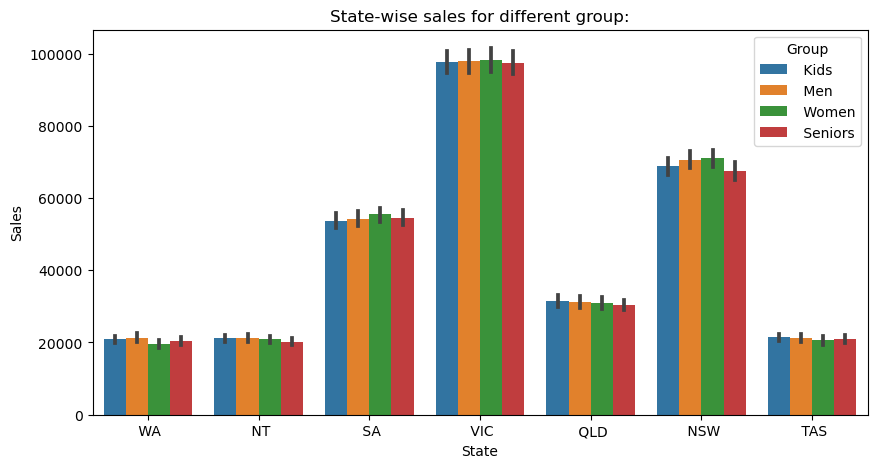

In [86]:
plt.figure(figsize=(10,5))
sns.barplot(x="State",y="Sales", data = df, hue="Group")
plt.title("State-wise sales for different group:")
plt.show()

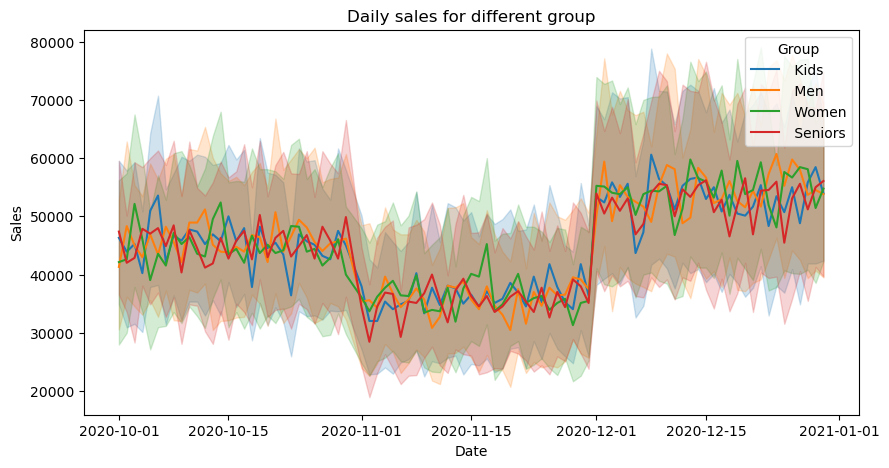

In [92]:
#daily sales report
plt.figure(figsize=(10,5))
sns.lineplot(x="Date", y="Sales", hue="Group" ,data=df)
plt.title("Daily sales for different group")
plt.show()

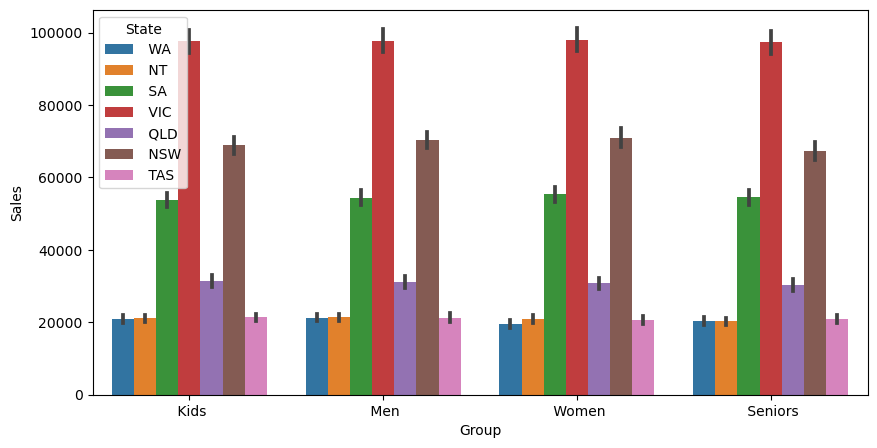

In [95]:
#group wise sales grouped by state
plt.figure(figsize=(10,5))
sns.barplot(x="Group", y = "Sales", hue="State",data=df)
plt.show()

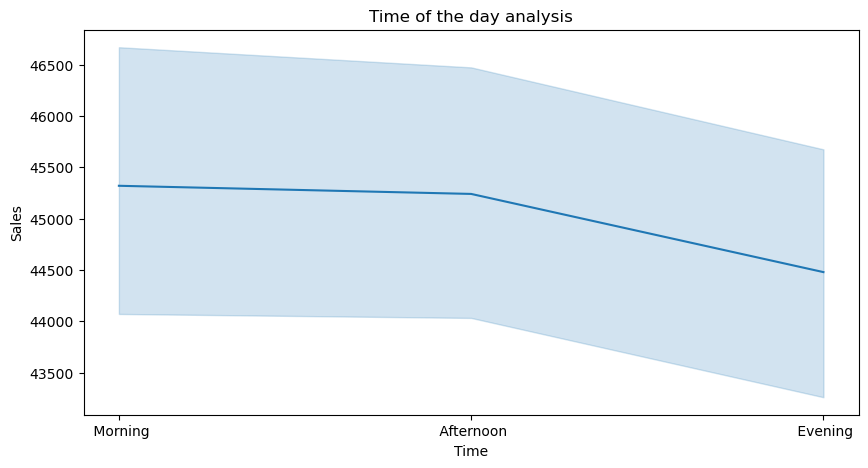

In [97]:
#Time day analysis
plt.figure(figsize=(10,5))
sns.lineplot(x="Time", y="Sales", data=df)
plt.title("Time of the day analysis")
plt.show()

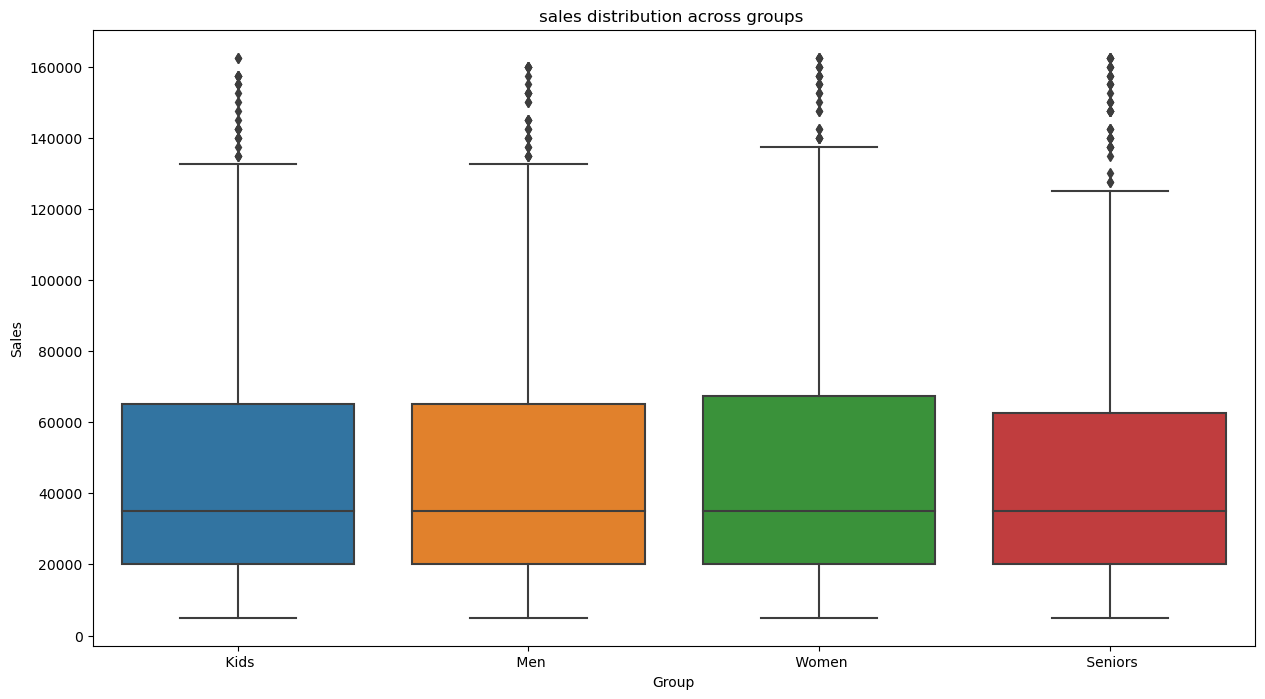

In [101]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Group",y="Sales",data=df)
plt.title("sales distribution across groups ")
plt.show()